# Text Classification - Vanilla Mixture of Experts (End 2 End, Hard) Analysis

----

## $\color{blue}{Sections:}$
* Preamble
* Load Results
* Scores
* Examination
* Save

## $\color{blue}{Preamble:}$

This notebook will analyse the results of the end to end, soft, MOE model.

## $\color{blue}{Load-Results:}$


In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/'

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'class/datasets/df_dev'
df = pd.read_pickle(path)

In [9]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book'],
      dtype='object')

In [5]:
grouped = dict(df.groupby("book_idx")['chapter_idx'].unique())

In [7]:
pred2book = {}
for key in grouped.keys():
  chapters = grouped[key]
  for chapter in chapters:
    pred2book[chapter] = key

In [8]:
df['vanilla_moe_e2e_hard_pseudo_book'] = df['vanilla_moe_e2e_hard_preds'].map(pred2book)

...saving

In [10]:
path = 'class/datasets/'
df.to_pickle(path + 'df_dev')

In [11]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book'],
      dtype='object')

## $\color{blue}{Scores:}$


In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [13]:
def bar_chart(values, cats, title):

    fig, ax = plt.subplots(1,1, figsize = (12,5))

    D_color = {
        0: '0',
        1: '0.5',
        2: '0.8',
        3: 'blue',
        4: 'red',
        5: 'green'

    }

    D_label = {
        0: "Uly1",
        1: "Uly2",
        2: "Uly3",
        3: "Dub",
        4: "Drac",
        5: "Rep"
    }

    ax.bar(
        x = list(range(len(values))),
        height = values,
        color = [D_color[el] for el in cats],
        edgecolor = 'black',
        zorder= 3,
        label= [D_label[el] for el in cats]  # Create a label for the legend

    )

    ax.grid(zorder=0,
            which='both',
            axis='y',
            linewidth=0.5,
            linestyle='--'
    )

    ax.yaxis.set_major_locator(plt.MaxNLocator())  # Show integer ticks


    # Create custom legend
    handles = [plt.Rectangle((0,0),1,1, color=D_color[i]) for i in D_color]
    labels = [D_label[i] for i in range(len(D_label))]
    ax.legend(handles, labels, title="Books", loc='upper right')


    # Add title
    plt.title(title)



    # Show the plot
    plt.show()


### $\color{red}{Chapter:}$

70 class problem


In [14]:
chapter_reals = df['chapter_idx'].to_numpy()
chapter_preds = df['vanilla_moe_e2e_hard_preds'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [15]:
chapter_accuracy = accuracy_score(chapter_reals, chapter_preds)
chapter_accuracy

0.5964730290456431

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [16]:
chapter_precision = precision_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_precision = precision_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_precision = precision_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_precision = precision_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro precision:', chapter_macro_precision)
print('weighted precision:', chapter_weighted_precision)
print('micro precision:', chapter_micro_precision)

macro precision: 0.5286589733578195
weighted precision: 0.6122626397544227
micro precision: 0.5964730290456431


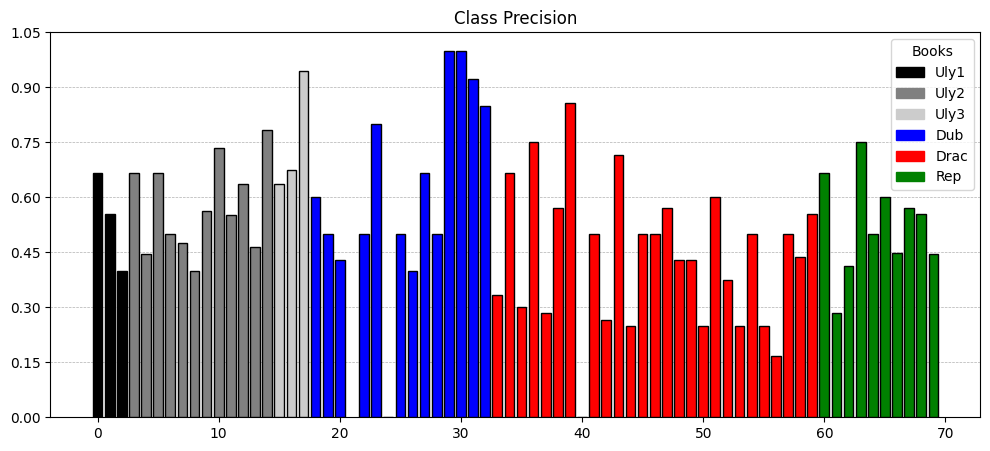

In [17]:
vals = chapter_precision
cats = [pred2book[i] for i in range(70)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [18]:
chapter_recall = recall_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_recall = recall_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_recall = recall_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_recall = recall_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro recall:', chapter_macro_recall)
print('weighted recall:', chapter_weighted_recall)
print('micro recall:', chapter_micro_recall)

macro recall: 0.5265831927779244
weighted recall: 0.5964730290456431
micro recall: 0.5964730290456431


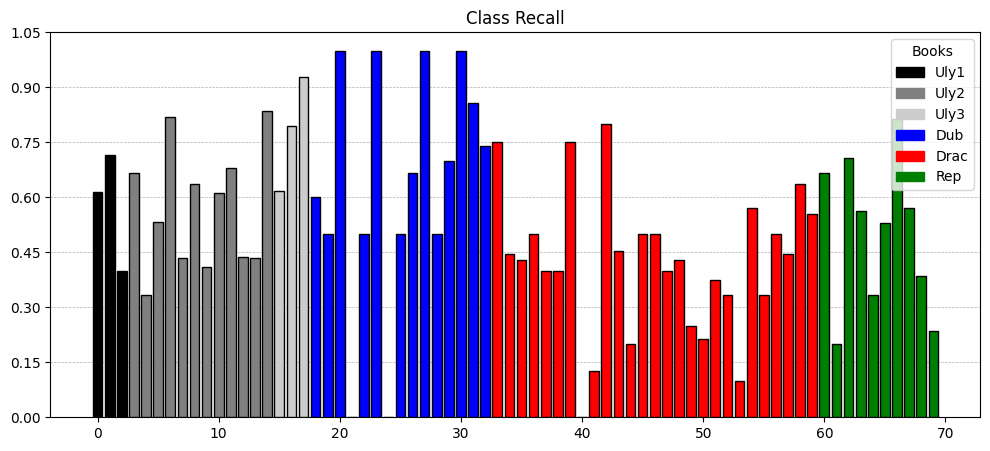

In [19]:
vals = chapter_recall
cats = [pred2book[i] for i in range(70)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [20]:
chapter_f1 = f1_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_f1 = f1_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_f1 = f1_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_f1 = f1_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro f1:', chapter_macro_f1)
print('weighted f1:', chapter_weighted_f1)
print('micro f1:', chapter_micro_f1)


macro f1: 0.506712364265387
weighted f1: 0.5922104984436917
micro f1: 0.5964730290456431


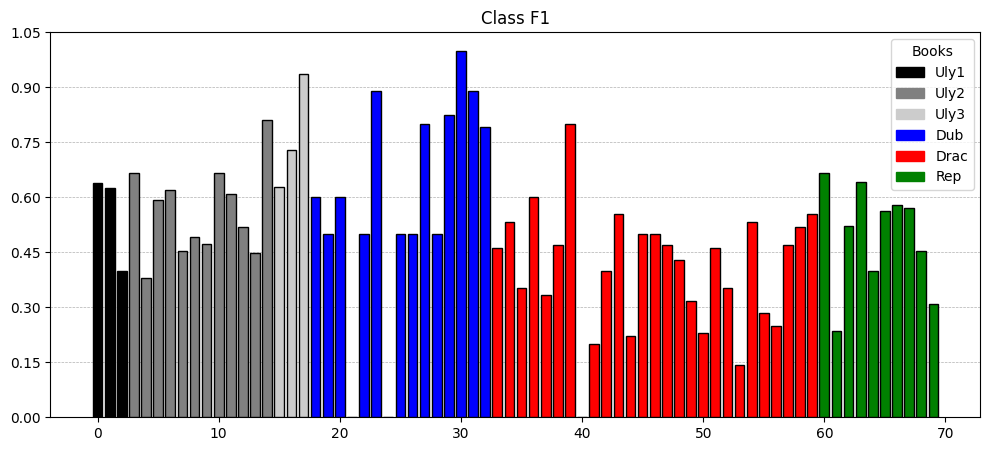

In [21]:
vals = chapter_f1
cats = [pred2book[i] for i in range(70)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

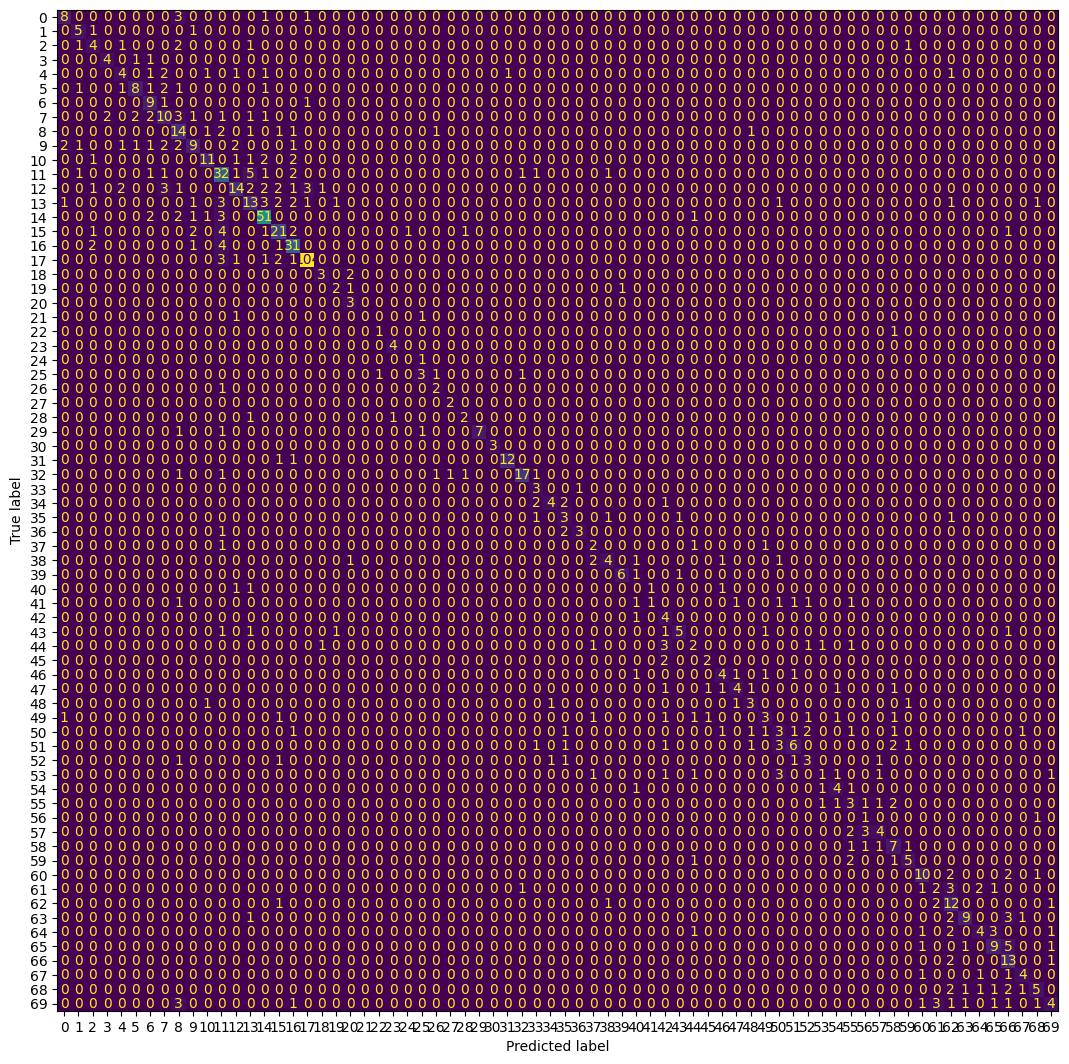

In [22]:
cm = confusion_matrix(chapter_reals, chapter_preds)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals, chapter_preds, colorbar=False, ax=ax)


### $\color{red}{Book:}$

6 class problem

In [23]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book'],
      dtype='object')

In [24]:
book_reals = df['book_idx'].to_numpy()
book_preds = df['vanilla_moe_e2e_hard_pseudo_book'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [25]:
book_accuracy = accuracy_score(book_reals, book_preds)
book_accuracy

0.8796680497925311

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [26]:
book_precision = precision_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_precision = precision_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_precision = precision_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_precision = precision_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro precision:', book_macro_precision)
print('weighted precision:', book_weighted_precision)
print('micro precision:', book_micro_precision)

macro precision: 0.8456878437779477
weighted precision: 0.8809336233631893
micro precision: 0.8796680497925311


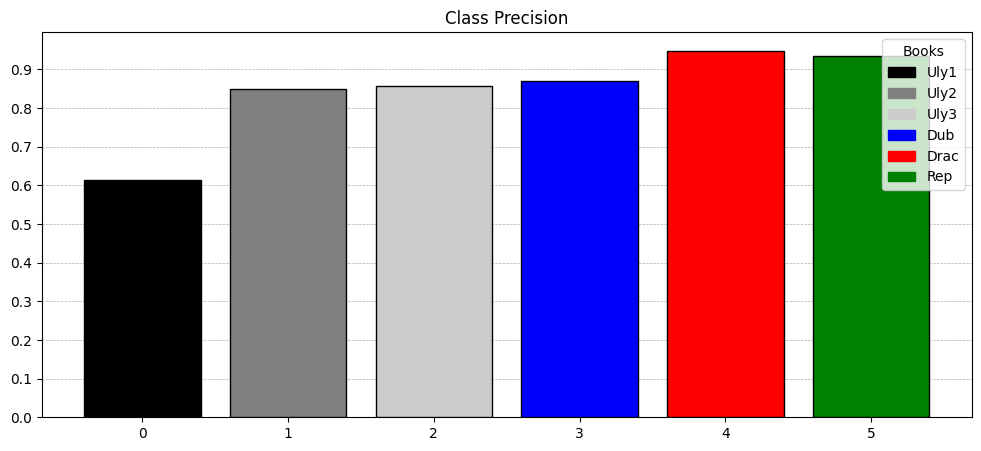

In [27]:
vals = book_precision
cats = [i for i in range(6)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [28]:
book_recall = recall_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_recall = recall_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_recall = recall_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_recall = recall_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro recall:', book_macro_recall)
print('weighted recall:', book_weighted_recall)
print('micro recall:', book_micro_recall)

macro recall: 0.8462765244647197
weighted recall: 0.8796680497925311
micro recall: 0.8796680497925311


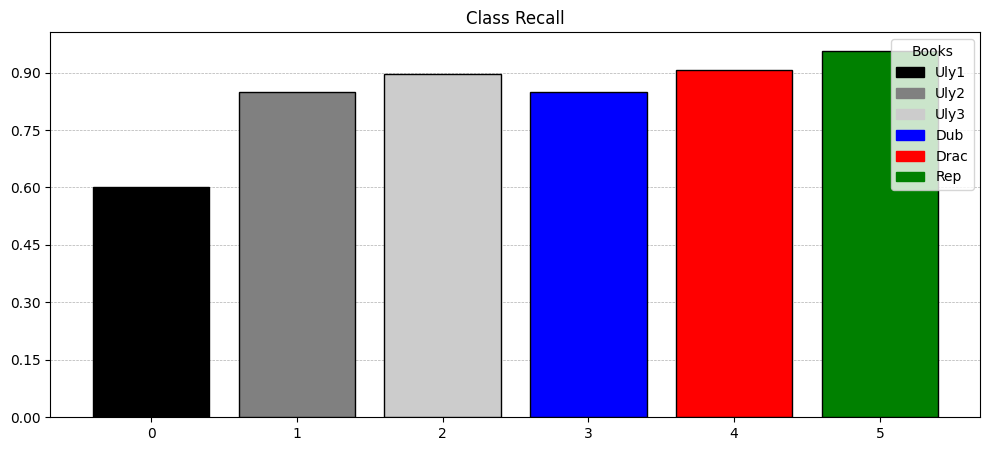

In [ ]:
vals = book_recall
cats = [i for i in range(6)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [29]:
book_f1 = f1_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_f1 = f1_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_f1 = f1_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_f1 = f1_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro f1:', book_macro_f1)
print('weighted f1:', book_weighted_f1)
print('micro f1:', book_micro_f1)

macro f1: 0.845838145857793
weighted f1: 0.8801353820762945
micro f1: 0.8796680497925311


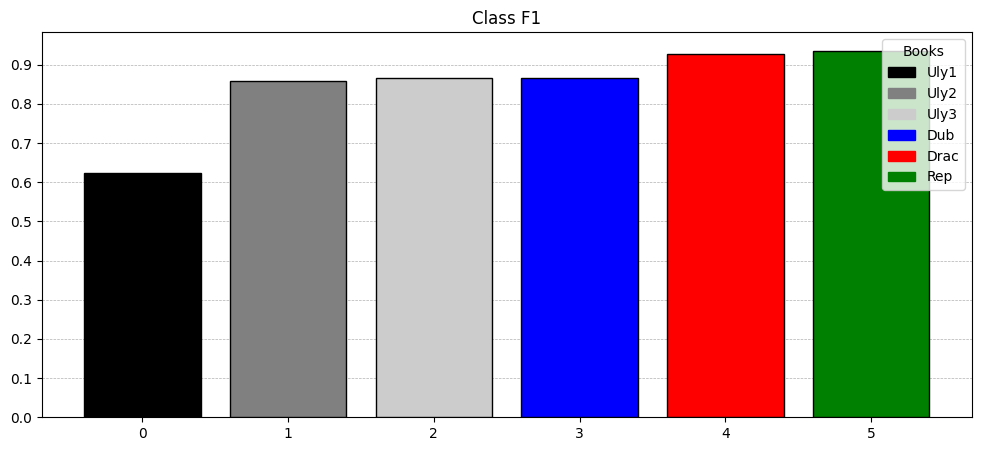

In [30]:
vals = book_f1
cats = [i for i in range(6)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

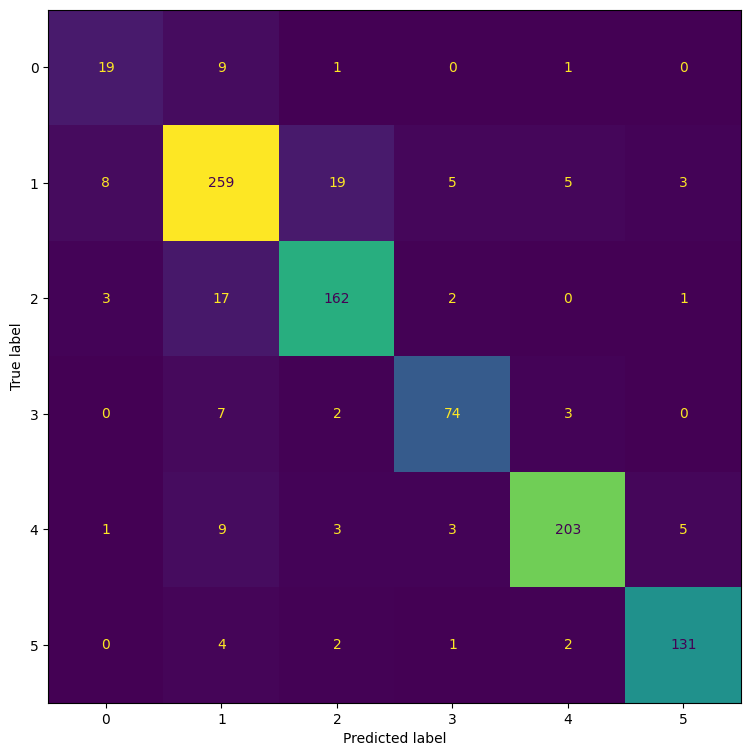

In [31]:
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals, book_preds, colorbar=False, ax=ax)

## $\color{blue}{Examination:}$

In [32]:
# subset incorrect and view
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book'],
      dtype='object')

In [33]:
df_wrong_book = df[df.book_idx != df.vanilla_moe_e2e_hard_pseudo_book]
df_wrong_book = df_wrong_book.reset_index(drop=True)
df_wrong_book.shape

(116, 15)

In [34]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_book.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_book.loc[ind]["book_idx"]}, Chapter: {df_wrong_book.loc[ind]["chapter_idx"]}')
  print(df_wrong_book.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_book.loc[ind]["vanilla_moe_e2e_hard_pseudo_book"]}, Chapter: {df_wrong_book.loc[ind]["vanilla_moe_e2e_hard_preds"]}')


 ------
Book: 2, Chapter: 15
The driver never said a word, good, bad or indifferent, but merely watched the two figures, as he sat on his lowbacked car, both black, one full, one lean, walk towards the railway bridge, to be married by Father Maher. As they walked they at times stopped and walked again continuing their tête à tête (which, of course,
Pred Book: 1, Chapter: 9

 ------
Book: 1, Chapter: 13
wastrels and murdered his goods with whores.
Pred Book: 2, Chapter: 17

 ------
Book: 3, Chapter: 22
Hohé, vraiment!”   They got into a rowboat at the slip and made out for the American’s yacht. There was to be supper, music, cards. Villona said with conviction:   “It is delightful!”   There was a yacht piano in the cabin.
Pred Book: 4, Chapter: 58

 ------
Book: 4, Chapter: 38
To my left the view is cut off by a black line of roof of the old house next the abbey. The sheep and lambs are bleating in the fields away behind me, and there is a clatter of a donkey’s hoofs up the paved road 

<ipython-input-34-1bca1839d90c>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_book.shape[0],1))


In [37]:
df_wrong_chapter = df[df.chapter_idx != df.vanilla_moe_e2e_hard_preds]
df_wrong_chapter = df_wrong_chapter.reset_index(drop=True)
df_wrong_chapter.shape

(389, 15)

In [38]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_chapter.loc[ind]["book_idx"]}, Chapter/ {df_wrong_chapter.loc[ind]["chapter_idx"]}')
  print(df_wrong_chapter.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_chapter.loc[ind]["vanilla_moe_e2e_hard_pseudo_book"]}, Chapter: {df_wrong_chapter.loc[ind]["vanilla_moe_e2e_hard_preds"]}')


 ------
Book: 4, Chapter/ 43
Mind you,” he added philosophically, “there’s a deal of the same nature in us as in them theer animiles.
Pred Book: 5, Chapter: 66

 ------
Book: 2, Chapter/ 17
came to page 50 the part about where she hangs him up out of a hook with a cord
Pred Book: 1, Chapter: 12

 ------
Book: 5, Chapter/ 60
And do you think, my excellent friend, that a musician when he adjusts the lyre would desire or claim to exceed or go beyond a musician in the tightening and loosening the strings?   I do not think that he would.   But he would claim to exceed the non-musician?   Of course.   And what would you say of the physician?
Pred Book: 5, Chapter: 62

 ------
Book: 1, Chapter/ 5
I fell foul of him one evening, I remember, at bowls.   Ned Lambert smiled.   —Yes, he was, he said, in Wisdom Hely’s. A traveller for blottingpaper.   —In God’s name, John Henry Menton said, what did she marry a coon like that for? She had plenty of game in her then.
Pred Book: 1, Chapter: 8

 ----

<ipython-input-38-38c76c2cdaee>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))


## $\color{blue}{Examination:}$

In [39]:
D = {
    'model': ["vanilla_moe_e2e_hard"],
    'params': [1308029],
    'book_accuracy' : [book_accuracy],
    'book_precision': [list(book_precision)],
    'book_macro_precision': [book_macro_precision],
    'book_weighted_precision': [book_weighted_precision],
    'book_recall': [list(book_recall)],
    'book_macro_recall': [book_macro_recall],
    'book_weighted_recall': [book_weighted_recall],
    'book_f1': [list(book_f1)],
    'book_macro_f1':[book_macro_f1],
    'book_weighted_f1': [book_weighted_f1],
        'chapter_accuracy' : [chapter_accuracy],
    'chapter_precision': [list(chapter_precision)],
    'chapter_macro_precision': [chapter_macro_precision],
    'chapter_weighted_precision': [chapter_weighted_precision],
    'chapter_recall': [list(chapter_recall)],
    'chapter_macro_recall': [chapter_macro_recall],
    'chapter_weighted_recall': [chapter_weighted_recall],
    'chapter_f1': [list(chapter_f1)],
    'chapter_macro_f1':[chapter_macro_f1],
    'chapter_weighted_f1': [chapter_weighted_f1],
}

In [40]:
path = "class/results/"
df_res = pd.read_pickle(path + "master_results.pk")

In [41]:
df_new = pd.DataFrame(D)

In [42]:
df_res = pd.concat([df_res, df_new], ignore_index=True)

In [43]:
df_res

,model,params,book_accuracy,book_precision,book_macro_precision,book_weighted_precision,book_recall,book_macro_recall,book_weighted_recall,book_f1,...,chapter_accuracy,chapter_precision,chapter_macro_precision,chapter_weighted_precision,chapter_recall,chapter_macro_recall,chapter_weighted_recall,chapter_f1,chapter_macro_f1,chapter_weighted_f1
0,vanilla,403070,0.883817,"[0.68, 0.8673469387755102, 0.8691099476439791,...",0.854691,0.882319,"[0.5666666666666667, 0.8528428093645485, 0.897...",0.836373,0.883817,"[0.6181818181818182, 0.8600337268128162, 0.882...",...,0.596473,"[0.6428571428571429, 0.8, 0.5, 0.3, 0.6, 0.714...",0.540711,0.614420,"[0.6923076923076923, 0.5714285714285714, 0.3, ...",0.502501,0.596473,"[0.6666666666666666, 0.6666666666666666, 0.375...",0.492163,0.592659
1,vanilla_moe_e2e_soft,1308029,0.879668,"[0.6, 0.872852233676976, 0.8601036269430051, 0...",0.842570,0.879652,"[0.6, 0.8494983277591973, 0.8972972972972973, ...",0.843171,0.879668,"[0.6, 0.8610169491525423, 0.8783068783068783, ...",...,0.618257,"[0.5882352941176471, 0.6666666666666666, 0.571...",0.560280,0.635325,"[0.7692307692307693, 0.5714285714285714, 0.4, ...",0.541950,0.618257,"[0.6666666666666666, 0.6153846153846154, 0.470...",0.536712,0.617050
2,vanilla_moe_e2e_hard,1308029,0.879668,"[0.6129032258064516, 0.8491803278688524, 0.857...",0.845688,0.880934,"[0.6333333333333333, 0.8662207357859532, 0.875...",0.846277,0.879668,"[0.6229508196721312, 0.8576158940397351, 0.866...",...,0.596473,"[0.6666666666666666, 0.5555555555555556, 0.4, ...",0.528659,0.612263,"[0.6153846153846154, 0.7142857142857143, 0.4, ...",0.526583,0.596473,"[0.64, 0.625, 0.4, 0.6666666666666666, 0.38095...",0.506712,0.592210


In [44]:
path = "class/results/"
df_res.to_pickle(path + "master_results.pk")